In [1]:
import random 
import warnings
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
import os 
os.environ['PYTHONHASHSEED']=str(1)

In [3]:
import tensorflow as tf 
import tensorflow.keras as keras 
import tensorflow.keras.layers 

In [4]:
def reset_random_seeds():
    os.environ['PYTHONHASHSEED']=str(1)
    tf.random.set_seed(1)
    np.random.seed(1)
    random.seed(1)

In [5]:
data=pd.read_csv('C:\\Users\\Okwua\\1-projects\\Phys_Descrip.txt')

In [6]:
data.drop(['Config','Ecoh','Eb','Eadh'], axis=1, inplace=True)

N_12=pd.DataFrame(data.loc[data['N'] == 12])
N_all=pd.DataFrame(data.loc[data['N']!=12])

In [7]:
X=N_all.iloc[:,:-1] ## independent features
y=N_all.iloc[:,-1] ## dependent features

In [8]:
scaler_x=StandardScaler()
X_scaled=scaler_x.fit(X)
X_scaled=scaler_x.transform(X)



scaler_y=StandardScaler()
y=y.values.reshape(-1,1)
y_scaled=scaler_y.fit(y)
y_scaled=scaler_y.transform(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.25,random_state=0)

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras.regularizers import l1

In [11]:
def create_model():
    reset_random_seeds()
    Ann_model = Sequential()

# The Input Layer :
    Ann_model.add(Dense(360, kernel_initializer='normal',input_dim = 11, activation='relu',kernel_regularizer=l1(0.01),bias_regularizer=l1(0.01)))

# The Hidden Layers :
    Ann_model.add(Dense(360,activation='relu'))
    Ann_model.add(Dropout(0.2))
    Ann_model.add(Dense(360,activation='relu'))
    Ann_model.add(Dropout(0.2))
    Ann_model.add(Dense(180,activation='relu'))
    Ann_model.add(Dropout(0.2))
    Ann_model.add(Dense(180,activation='relu'))
    Ann_model.add(Dense(90,activation='relu'))

# The Output Layer :
    Ann_model.add(Dense(1,activation='linear'))

# Compile the network :
    Ann_model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error'],)
    return Ann_model
 


In [12]:
from keras.wrappers.scikit_learn import KerasRegressor
Ann_model=KerasRegressor(build_fn=create_model)
from keras.callbacks import EarlyStopping

early_stopping=EarlyStopping()

In [13]:
model_history=Ann_model.fit(X_train, y_train,validation_data=(X_train,y_train),verbose=0, batch_size = 10, epochs = 100,callbacks=[early_stopping])



In [14]:
pred_test=Ann_model.predict(X_test)
pred_train=Ann_model.predict(X_train)

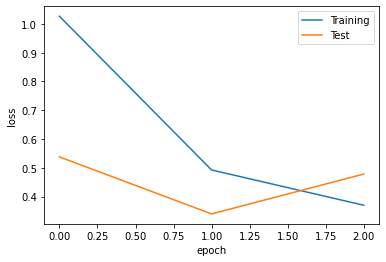

In [15]:
plt.plot(model_history.history['loss'], label='Training')
plt.plot(model_history.history['val_loss'], label='Test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

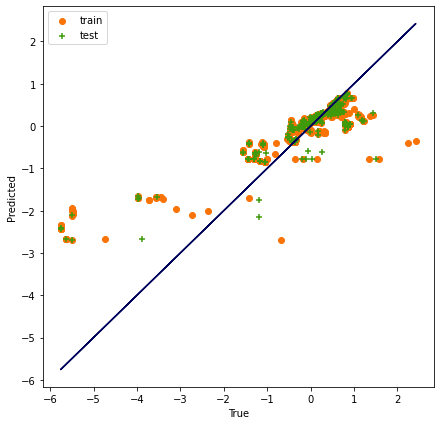

In [16]:
plt.figure(figsize=(7,7))
plt.scatter(y_train,pred_train, marker='o', color='#f97306', label='train' )
plt.scatter(y_test,pred_test, marker='+', color='#3f9b0b', label='test' )
plt.legend(loc='upper left')
plt.plot(y_train,y_train, color='#00035b')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

In [17]:
from sklearn import metrics 
from sklearn.metrics import r2_score

In [18]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_test))
print('MSE:', metrics.mean_squared_error(y_test, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))
print('R_squared:'+ str(round(r2_score(y_test,pred_test),2)))

MAE: 0.2621572870087655
MSE: 0.2925199324997896
RMSE: 0.5408511186082448
R_squared:0.68


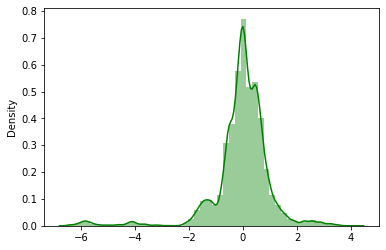

In [19]:
import seaborn as sns
sns.distplot(y_test-pred_test, color='green');

In [20]:
y_test=scaler_y.inverse_transform(y_test)
np.mean(y_test)

-378.3327680525164

In [21]:
pred_test=scaler_y.inverse_transform(pred_test)
np.mean(pred_test)

-377.83582